<div class="alert alert-block alert-success">
<h1>Learning and Adaptivity, Homework 3</h1>
<h2>Topics:</h2>
<h3>Parametric and Nonparametric Techniques</h3>
</div>

In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import scipy


# Task1
Plot a histogram of the binomial distribution  
$Bin(m|N,\mu)= 
\left(\begin{array}{cc} 
N\\
m
\end{array}\right) 
\mu^m(1-\mu)^{N-m}$  
where  
$\left(\begin{array}{cc} 
N\\
m
\end{array}\right)=\frac{N!}{(N-m)!m!}$  
for $N=10$ and $\mu=0.25$

Binomial Distribution: n=10 (No.of trails in a experiment), p =0.25 (Probability of success)


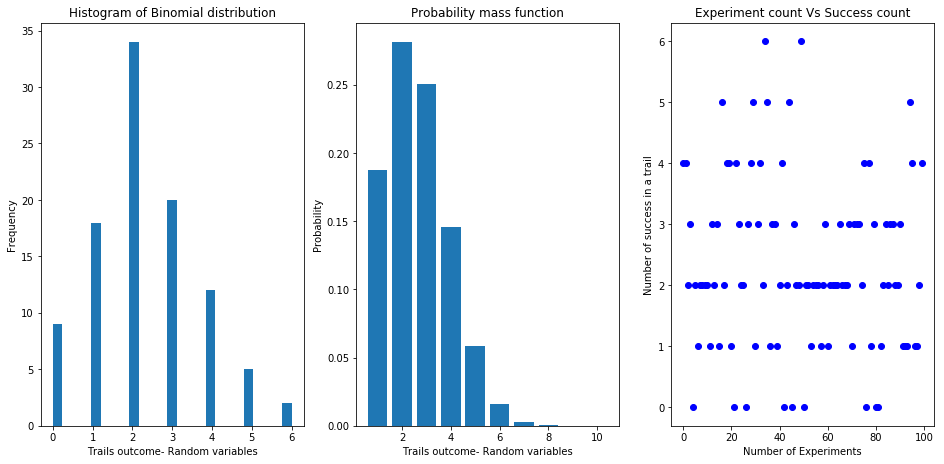

In [2]:
# u=p ; N= n; m=m (Just to match the given equ)
# Out of 10 (n) trails in the 1 experiment how many success is m. 
# And the experiment is repeated 100 times for more precision.

def binomial_distribution(N,m,mean):
    binomial_value=list()
    for i in m:
        combination=scipy.special.comb(N,i)
        mean_power_term=mean**i
        sub_mean_power_term=(1-mean) ** (N-i)
        binomial_value.append(combination * mean_power_term * sub_mean_power_term)
    return binomial_value

print("Binomial Distribution: n=10 (No.of trails in a experiment), p =0.25 (Probability of success)")
f = plt.figure(figsize=(16,7))
plt.subplots_adjust(left=None,bottom=0.1,top=0.9,wspace=0.2,hspace=0.5)
n=10 #or number of successful trails in a experiment
p=0.25 #prob success
Number_of_experiments = 100

Random_variables_list=np.random.binomial(n,p,Number_of_experiments)
plt.subplot(131)
plt.hist(Random_variables_list,bins=25);
# Get the binomially distributed samples and plot histogram.
# This is binomially distributed but the corresponding probability is obtained by below
plt.xlabel('Trails outcome- Random variables')
plt.ylabel('Frequency')
plt.title('Histogram of Binomial distribution')

plt.subplot(133)
plt.plot(Random_variables_list, 'bo', alpha=1)
# Gives the pmf
# Scaling the y with the number of times the experiment is repeated will give Histogram
plt.xlabel('Number of Experiments')
plt.ylabel('Number of success in a trail')
plt.title('Experiment count Vs Success count')

# Another method
m=np.random.randint(1,n+1,Number_of_experiments) # 1-n+1 (here 1-10) is the number of trails in the experiment
# ie., Number of favourable outcomes supporting your random variable. (Success)
# For instance: Like 8 times head in tossing if the random variable is getting head while tossing
# 100 is the number of times the experiment is carried out to build the distribution.
s=binomial_distribution(n,m,p)
# Get the probability of the binomially distributed random variable samples.
plt.subplot(132)
plt.bar(m,s)
# Gives the pmf
# Scaling the y with the number of times the experiment is repeated will give Histogram
plt.xlabel('Trails outcome- Random variables')
plt.ylabel('Probability')
plt.title('Probability mass function')


plt.show();


In [3]:
# using lib random
# tweak n, p, nPoints and observe the result.
# n = 10
# p = 0.2
# nPoints = 5000
# xBinom = np.random.binomial(n,p,size=nPoints)

# # Let's plot up the distribution.
# plt.figure()
# plt.subplot(121)
# plt.plot(xBinom, 'bo', alpha=0.5)
# plt.ylim(0,np.max(xBinom)+1)
# plt.xlabel('Row number')
# plt.ylabel('r successes')
# plt.grid()
# plt.subplot(122)
# nB, dum, dum = plt.hist(xBinom, bins=25,color='b',alpha=0.5)
# #plt.xlim(0,n)
# plt.xlabel('r successes')
# plt.ylabel('N(r successes)')
# plt.title('n=%i, p=%.2f, N=%i "experiments"' % (n,p,nPoints))
# plt.grid()


# Task2 

1) Write a function **generateDataset(numberOfSamplesInClass, numberClasses)**.   
This function generates/returns a dataset which contains a **numberClasses** number of classes. Each class includes **numberOfSamplesInClass** elements.  
For simplicity and better visualisation, to generate samples for each class a two-dimensional gaussians can be used. The mean $\mu$-parameters for these functions are randomly selected on a range from 0 to 5 on each axes (x and y) and the std $\sigma$-parameter is 0.5. The value of 0.5 is chosen so that the objects are sufficiently well separated.

2) Using **generateDataset** function create and visualise a dataset which includes 3 classes with 40 elements in each.

3) Implement K-nearest neihbourhood algorithm (kNN)

4) Visualise the performance of your kNN (like shown in slide 40) using three-four datasets generated by **generateDataset** function and show the results of the algorithm for various "k".  

# Dataset generation

In [4]:
def plot_dataset(x,y,labels):
    unique=np.unique(labels)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    for i in unique:
        s=np.where((labels==i))[0]
        plt.scatter(x[s],y[s],label=i,color=next(colors))
        plt.grid()
        plt.xlabel('Feature-1, x')
        plt.ylabel('Feature-2, y')
        plt.legend()
    return None

Enter the number of classes in the dataset (Upto 7): 3
Enter the number of samples in each class: 40


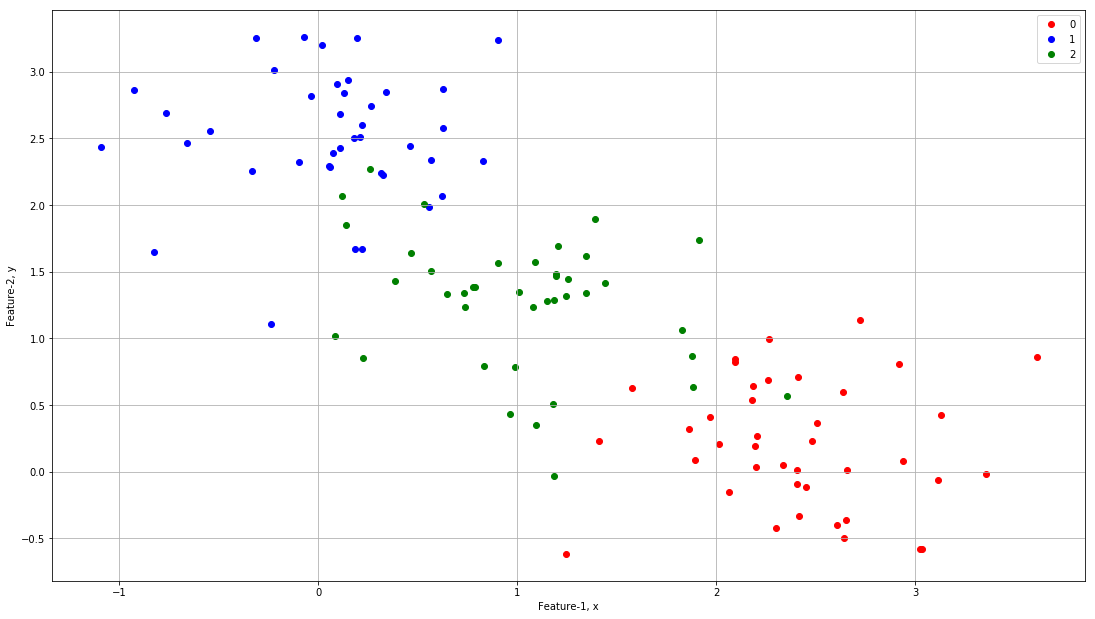

In [5]:
import itertools
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
# colors = itertools.cycle(["r", "b", "g","k","orange","c","yellow"])
colors= itertools.cycle(["r", "b", "g"])
def generateDataset(numberOfSamplesInClass,numberClasses):
    X,y=make_blobs(n_samples=numberOfSamplesInClass*numberClasses,centers=numberClasses,
                   n_features=2,center_box=(0,3),cluster_std=0.5)
    # 2D Gaussian with two features and Normal distribution
    labels=y
    x= X[:,0]
    y=X[:,1]
    return x,y,labels

if __name__=='__main__':
    numberClasses=int(input("Enter the number of classes in the dataset (Upto 7): "))
    numberOfSamplesInClass=int(input("Enter the number of samples in each class: "))

    x,y,labels=generateDataset(numberOfSamplesInClass,numberClasses)
    plot_dataset(x,y,labels)
    



# KNN Implementation

In [6]:
import math
def data_split(x_data,y_data,label_data,train_data_percentage):
    total_length=len(x_data)
    train_length=math.floor(len(x_data)*train_data_percentage/100)
    
    train_x=x_data[:train_length]
    test_x=x_data[total_length-(total_length-train_length)-1:-1]
    
    train_y=y_data[:train_length]
    test_y=y_data[total_length-(total_length-train_length)-1:-1]
    train_labels=label_data[:train_length]
    test_labels=label_data[total_length-(total_length-train_length)-1:-1]
    
    trainset=np.array([train_x,train_y,train_labels]).T # Training set
    testset=np.array([test_x,test_y,test_labels]).T # Testing set
    
    train_label=np.array([train_labels]) # Train labels
    test_label=np.array([test_labels]) # Labels for the test for validation
    
    return trainset,testset,train_label,test_label


In [7]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += math.pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [8]:
def subsampling_k_nearest_neighbors(trainset,testinstance,k):
    distance=list()
    length=len(testinstance)-1
    for x in range(len(trainset)):
        euclidean_distance=euclideanDistance(testinstance, trainset[x],length)
        distance.append((trainset[x],euclidean_distance))
    distance.sort(key=operator.itemgetter(1))
    neighbors=[]
    for x in range(k):
        neighbors.append(distance[x][0])
    return neighbors

In [9]:
def getResponse(neighbors,train_label,trainset):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [10]:
def getAccuracy(testset, predictions):
    testlabel=testset[:,-1]
    s=np.where(testlabel==predictions)[0]
    correct=len(s)
    return (correct/float(len(predictions))) * 100.0

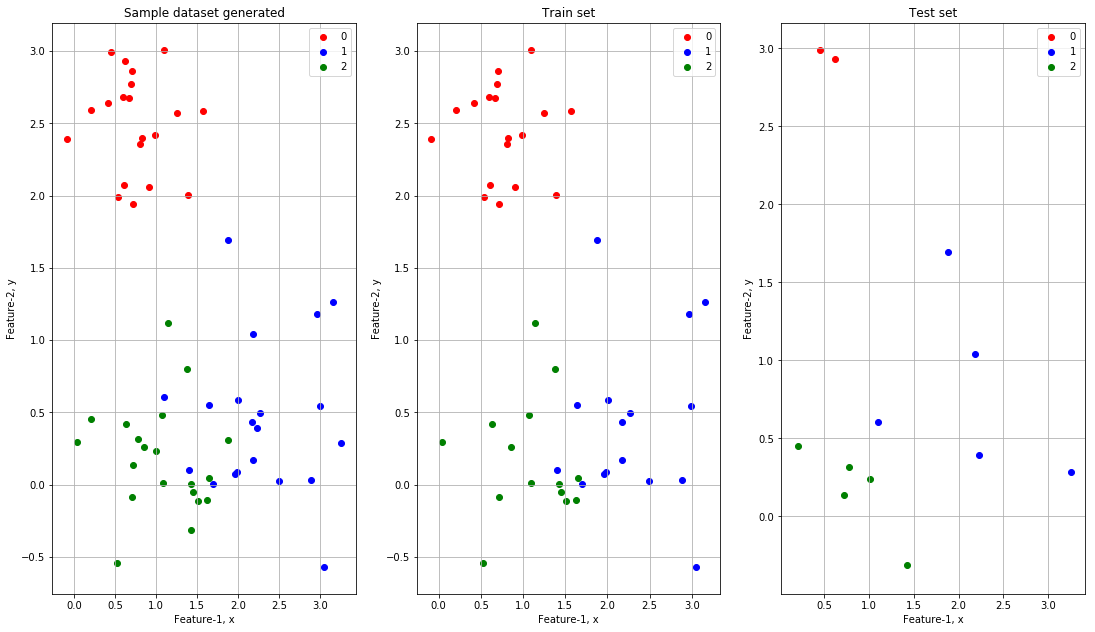

In [11]:
import operator
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
# Main()
x_data,y_data,label_data=generateDataset(20,3)
plt.subplot(131)
plot_dataset(x_data,y_data,label_data)
plt.title('Sample dataset generated')
trainset,testset,train_label,test_label=data_split(x_data,y_data,label_data,80)
plt.subplot(132)
plot_dataset(trainset[:,0],trainset[:,1],train_label[0,:])
plt.title('Train set')
plt.subplot(133)
plot_dataset(testset[:,0],testset[:,1],test_label[0,:])
plt.title('Test set')
plt.show();

# Implementation in sklearn using CKD tree. Just a reference for the decision plot below

Accuracy: 91.66666666666666%


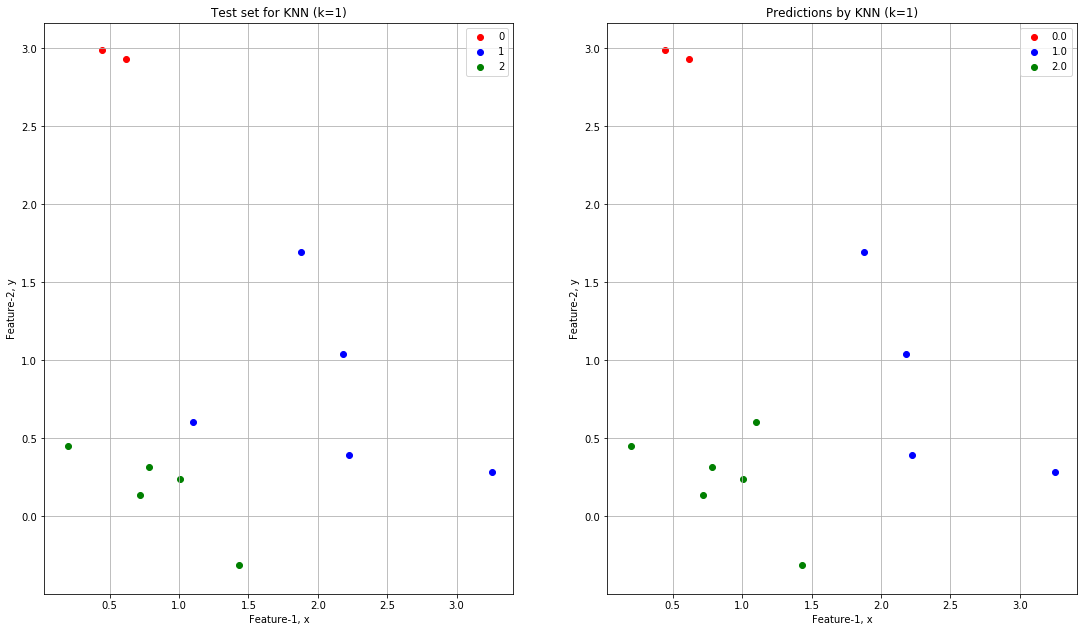

In [12]:
k=1
loop=range(len(testset))
predictions=list()
for x in loop:
    neighbors = subsampling_k_nearest_neighbors(trainset, testset[x], k)
    result = getResponse(neighbors,train_label,trainset)
    predictions.append(result)
plt.subplot(121)
plot_dataset(testset[:,0],testset[:,1],test_label[0,:])
plt.title('Test set for KNN (k=1)')
plt.subplot(122)
plot_dataset(testset[:,0],testset[:,1],predictions)
plt.title('Predictions by KNN (k=1)')
accuracy = getAccuracy(testset, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 83.33333333333334%


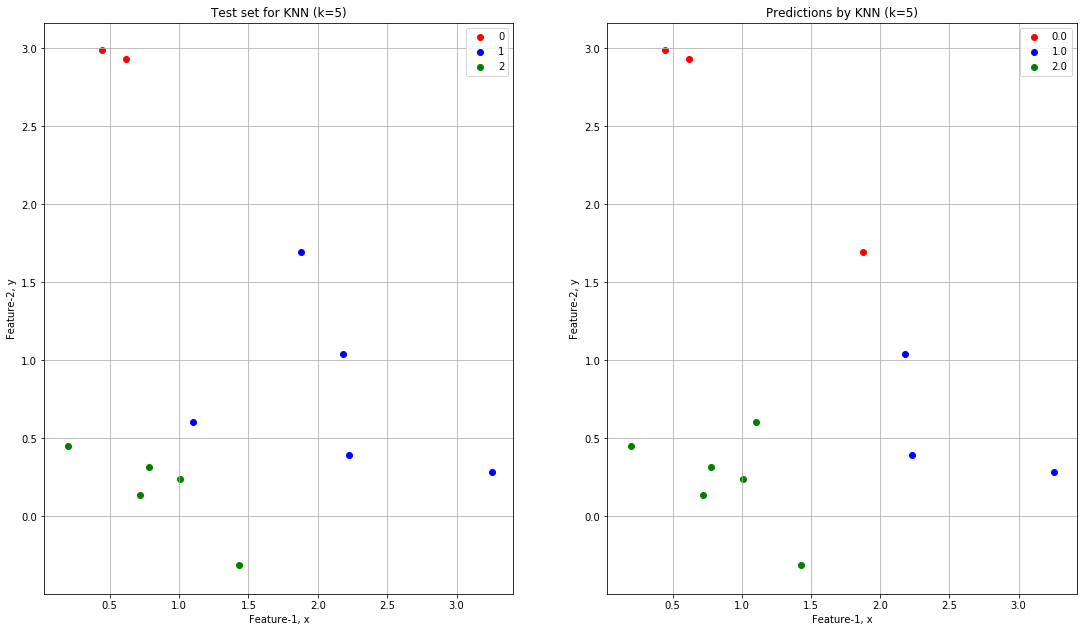

In [13]:
k=5
loop=range(len(testset))
predictions=list()
for x in loop:
    neighbors = subsampling_k_nearest_neighbors(trainset, testset[x], k)
    result = getResponse(neighbors,train_label,trainset)
    predictions.append(result)
plt.subplot(121)
plot_dataset(testset[:,0],testset[:,1],test_label[0,:])
plt.title('Test set for KNN (k=5)')
plt.subplot(122)
plot_dataset(testset[:,0],testset[:,1],predictions)
plt.title('Predictions by KNN (k=5)')
accuracy = getAccuracy(testset, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 75.0%


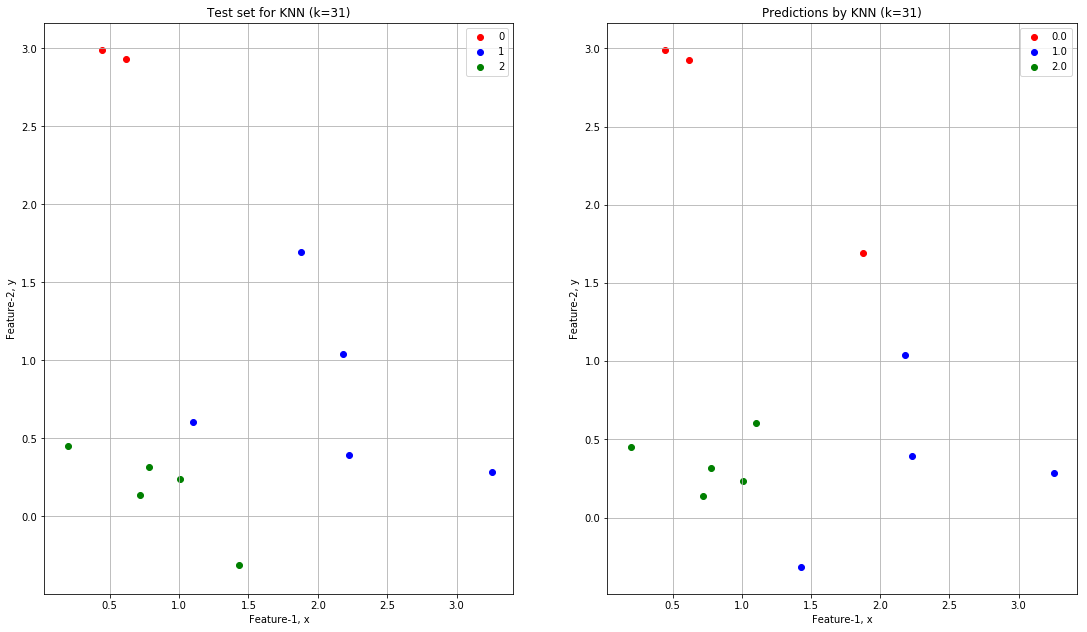

In [14]:
k=31
loop=range(len(testset))
predictions=list()
for x in loop:
    neighbors = subsampling_k_nearest_neighbors(trainset, testset[x], k)
    result = getResponse(neighbors,train_label,trainset)
    predictions.append(result)
plt.subplot(121)
plot_dataset(testset[:,0],testset[:,1],test_label[0,:])
plt.title('Test set for KNN (k=31)')
plt.subplot(122)
plot_dataset(testset[:,0],testset[:,1],predictions)
plt.title('Predictions by KNN (k=31)')
accuracy = getAccuracy(testset, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

# Implementation of KNN using scikit-learn

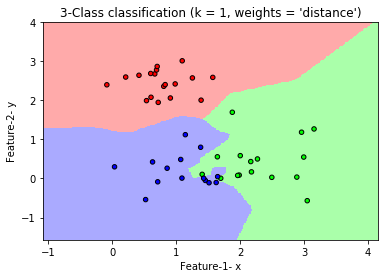

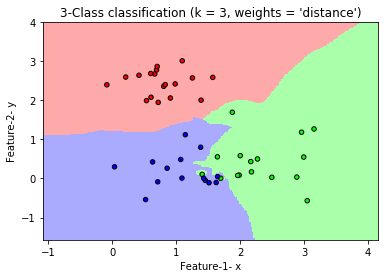

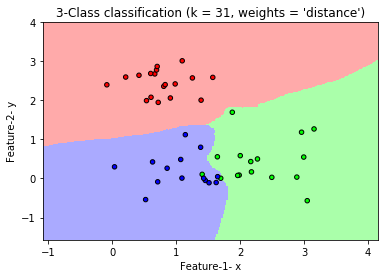

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = [1,3,31]
# Reference

# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = trainset[:,:2]
y = trainset[:,-1]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
weights='distance'
for n in n_neighbors:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n, weights))
    plt.xlabel('Feature-1- x')
    plt.ylabel('Feature-2- y')

plt.show()

# Trial code of KNN using sklearn

In [18]:
import pandas as pd
# Using sklearn, pandas
feature_x,feature_y,class_labels=generateDataset(100,3)
# The sample count has been increased to 100 because 
# while testing the test sample-set didnot include all the classes
df=pd.DataFrame({'x': feature_x,'y':feature_y,'labels':class_labels})
df.head()

,x,y,labels
0,1.089599,3.121931,1
1,0.088890,3.037443,1
2,1.364663,2.295472,1
3,1.540478,2.166113,0
4,2.220949,1.499690,0


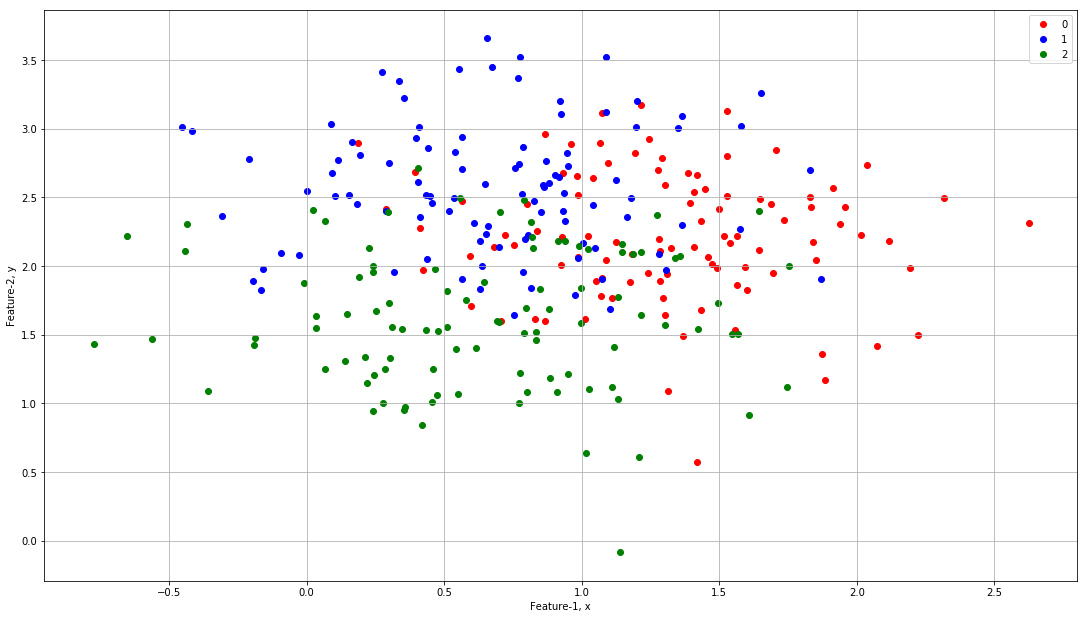

In [19]:
plot_dataset(feature_x,feature_y,class_labels)

In [20]:
from sklearn.model_selection import train_test_split  
# Train - test split
X= df.iloc[:,:-1].values
# print(X)
y=df.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  


In [21]:
from sklearn.preprocessing import StandardScaler  
# Feature scaling for normalization

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [22]:
from sklearn.neighbors import KNeighborsClassifier  
# KNN classifier

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred = classifier.predict(X_test) 

In [24]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 9  5  5]
 [ 6 15  2]
 [ 4  3 11]]
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        19
           1       0.65      0.65      0.65        23
           2       0.61      0.61      0.61        18

   micro avg       0.58      0.58      0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60



In [25]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

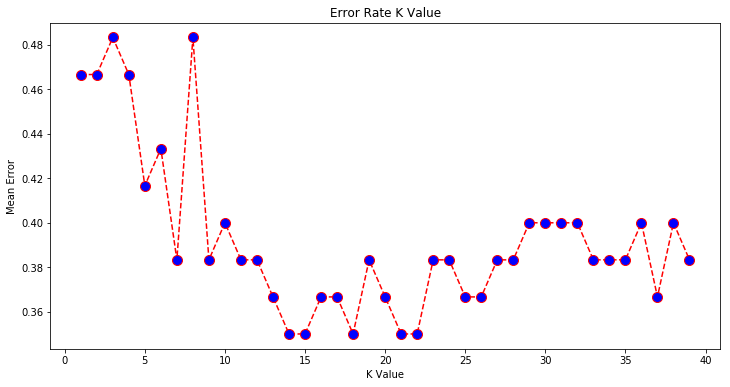

In [26]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

References:
1. Machine learning mastery, "How to Generate Test Datasets in Python with scikit-learn", Available at: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/ , Accessed on: 19.04.2019.
2. Stackabuse, "K-Nearest Neighbors Algorithm in Python and Scikit-Learn", Available at: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ , Accessed on: 19.04.2019.
3. Machine learning mastery, "Tutorial To Implement k-Nearest Neighbors in Python From Scratch", Available at: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ , Accessed on: 19.04.2019.